In [1]:
import matplotlib
import torch
import networkx as nx
import cupy as cp
import matplotlib.pyplot as plt

In [2]:
from torch_geometric.datasets import TUDataset

In [10]:
PROTEINS_dataset = TUDataset(root='C:/Users/Utilisateur/Documents/GitHub/DGCNN/data', name='PROTEINS')
IMDB_dataset = TUDataset(root='C:/Users/Utilisateur/Documents/GitHub/DGCNN/data', name='IMDB-BINARY')
REDDIT_dataset = TUDataset(root='C:/Users/Utilisateur/Documents/GitHub/DGCNN/data', name='REDDIT-BINARY')

In [9]:
print(f'Dataset: {dataset}:')
print('======================')
print(f'Nombre de graphes: {len(dataset)}')
print(f'Nombre d\'attributs: {dataset.num_features}')
print(f'Number de classes: {dataset.num_classes}')

Dataset: PROTEINS(1113):
Nombre de graphes: 1113
Nombre d'attributs: 3
Number de classes: 2


In [149]:
print(data)
print('==============================================================')
print(f'Nœuds : {data.num_nodes}')
print(f'Arêtes : {data.num_edges}')
print(f'Degré moyen : {data.num_edges / data.num_nodes:.2f}')
print(f'Présence de nœuds isolés : {data.contains_isolated_nodes()}')
print(f'Présence de boucle : {data.contains_self_loops()}')
print(f'Est non-dirigé : {data.is_undirected()}')

Data(edge_index=[2, 116], y=[1], num_nodes=56)
Nœuds : 56
Arêtes : 116
Degré moyen : 2.07
Présence de nœuds isolés : False
Présence de boucle : False
Est non-dirigé : True


In [34]:
import numpy as np
PROTEINS_tab = np.empty((len(PROTEINS_dataset),6))
for i in range(0, len(PROTEINS_dataset)):
    data = PROTEINS_dataset[i]
    noeud = data.num_nodes
    lien = data.num_edges
    degres = data.num_edges / data.num_nodes
    boucle = data.contains_self_loops()
    isolated = data.contains_isolated_nodes()
    oriented = data.is_undirected()
    PROTEINS_tab[i,:] = np.array([noeud, lien, degres, boucle, isolated, oriented])

In [35]:
IMDB_tab = np.empty((len(IMDB_dataset),6))
for i in range(0, len(IMDB_dataset)):
    data = IMDB_dataset[i]
    noeud = data.num_nodes
    lien = data.num_edges
    degres = data.num_edges / data.num_nodes
    boucle = data.contains_self_loops()
    isolated = data.contains_isolated_nodes()
    oriented = data.is_undirected()
    IMDB_tab[i,:] = np.array([noeud, lien, degres, boucle, isolated, oriented])

In [36]:
REDDIT_tab = np.empty((len(REDDIT_dataset),6))
for i in range(0, len(REDDIT_dataset)):
    data = REDDIT_dataset[i]
    noeud = data.num_nodes
    lien = data.num_edges
    degres = data.num_edges / data.num_nodes
    boucle = data.contains_self_loops()
    isolated = data.contains_isolated_nodes()
    oriented = data.is_undirected()
    REDDIT_tab[i,:] = np.array([noeud, lien, degres, boucle, isolated, oriented])

In [78]:
import pandas as pd
column_names = ['Nbr_noeud', 'Nbr_lien', 'Degres_moyen' , 'boucle', 'isolated', 'oriented']

PROTEINS_df = pd.DataFrame(PROTEINS_tab, columns=column_names)
PROTEINS_df = PROTEINS_df.astype(dtype = {'Nbr_noeud': int,
                'Nbr_lien': int,
                'Degres_moyen': float,
                'boucle': bool,
                'isolated': bool,
                'oriented': bool})

IMDB_df = pd.DataFrame(IMDB_tab, columns=column_names)
IMDB_df = IMDB_df.astype(dtype = {'Nbr_noeud': int,
                'Nbr_lien': int,
                'Degres_moyen': float,
                'boucle': bool,
                'isolated': bool,
                'oriented': bool})

REDDIT_df = pd.DataFrame(REDDIT_tab, columns=column_names)
REDDIT_df = REDDIT_df.astype(dtype = {'Nbr_noeud': int,
                'Nbr_lien': int,
                'Degres_moyen': float,
                'boucle': bool,
                'isolated': bool,
                'oriented': bool})

In [79]:
print(REDDIT_df)

      Nbr_noeud  Nbr_lien  Degres_moyen  boucle  isolated  oriented
0           218       480      2.201835   False     False      True
1           717      1662      2.317992   False     False      True
2           228       500      2.192982   False     False      True
3           486      1164      2.395062   False     False      True
4           396       908      2.292929   False      True      True
...         ...       ...           ...     ...       ...       ...
1995        160       396      2.475000   False     False      True
1996        117       286      2.444444   False     False      True
1997         76       154      2.026316   False     False      True
1998         65       132      2.030769   False     False      True
1999         37        82      2.216216   False     False      True

[2000 rows x 6 columns]


In [49]:
# TEST PROTEINS
min_features = PROTEINS_df.min(axis=0)
max_features = PROTEINS_df.max(axis=0)
print(min_features)
print(max_features)

Nbr_noeud        4.000000
Nbr_lien        10.000000
Degres_moyen     1.714286
boucle           0.000000
isolated         0.000000
oriented         1.000000
dtype: float64
Nbr_noeud        620.000000
Nbr_lien        2098.000000
Degres_moyen       5.071429
boucle             0.000000
isolated           1.000000
oriented           1.000000
dtype: float64


In [61]:
min_nbr_noeud = min(PROTEINS_df['Nbr_noeud'].min(axis=0),IMDB_df['Nbr_noeud'].min(axis=0),REDDIT_df['Nbr_noeud'].min(axis=0))
max_nbr_noeud = max(PROTEINS_df['Nbr_noeud'].max(axis=0),IMDB_df['Nbr_noeud'].max(axis=0),REDDIT_df['Nbr_noeud'].max(axis=0))
noeud = np.arange(min_nbr_noeud, max_nbr_noeud, 1, dtype=int)
# Lien
min_nbr_lien = min(PROTEINS_df['Nbr_lien'].min(axis=0),IMDB_df['Nbr_lien'].min(axis=0),REDDIT_df['Nbr_lien'].min(axis=0))
max_nbr_lien = max(PROTEINS_df['Nbr_lien'].max(axis=0),IMDB_df['Nbr_lien'].max(axis=0),REDDIT_df['Nbr_lien'].max(axis=0))
lien = np.arange(min_nbr_lien, max_nbr_lien, 1, dtype=int)
# Degres
min_nbr_degres = min(PROTEINS_df['Degres_moyen'].min(axis=0),IMDB_df['Degres_moyen'].min(axis=0),REDDIT_df['Degres_moyen'].min(axis=0))
max_nbr_degres = max(PROTEINS_df['Degres_moyen'].max(axis=0),IMDB_df['Degres_moyen'].max(axis=0),REDDIT_df['Degres_moyen'].max(axis=0))
degres = np.arange(min_nbr_degres, max_nbr_degres, 1, dtype=int)
# Categorie binaire
binaire = [0.0,1.0]

In [273]:
# Distribution nbr_noeud par nbr_graph
PROTEINS_distri_noeud_par_nbrGraph = PROTEINS_df.groupby(['Nbr_noeud'])['Nbr_noeud'].count().reset_index(name='count')
PROTEINS_distri_noeud_par_nbrGraph['name']='PROTEINS'

IMDB_distri_noeud_par_nbrGraph = IMDB_df.groupby(['Nbr_noeud'])['Nbr_noeud'].count().reset_index(name='count')
IMDB_distri_noeud_par_nbrGraph['name']='IMDB'

REDDIT_distri_noeud_par_nbrGraph = REDDIT_df.groupby(['Nbr_noeud'])['Nbr_noeud'].count().reset_index(name='count')
REDDIT_distri_noeud_par_nbrGraph['name']='REDDIT'

distri_noeud = pd.concat([REDDIT_distri_noeud_par_nbrGraph,
                          IMDB_distri_noeud_par_nbrGraph,
                          PROTEINS_distri_noeud_par_nbrGraph])

fig = px.bar(
    distri_noeud,
    x='Nbr_noeud',
    y='count',
    color='name',
    title='Repartition du nombre de graphes par rapport au nombre de noeud',
    range_x=[0,200],
    labels={'count':'Nbr graphs','Nbr_noeud':'Nbr noeud','name':'Dataset'},
)

# Add range slider
fig["layout"].pop("updatemenus")
fig.show()

In [276]:
# Distribution nbr_lien par nbr_graph
PROTEINS_distri_lien_par_nbrGraph = PROTEINS_df.groupby(['Nbr_lien'])['Nbr_lien'].count().reset_index(name='count')
PROTEINS_distri_lien_par_nbrGraph['name']='PROTEINS'

IMDB_distri_lien_par_nbrGraph = IMDB_df.groupby(['Nbr_lien'])['Nbr_lien'].count().reset_index(name='count')
IMDB_distri_lien_par_nbrGraph['name']='IMDB'

REDDIT_distri_lien_par_nbrGraph = REDDIT_df.groupby(['Nbr_lien'])['Nbr_lien'].count().reset_index(name='count')
REDDIT_distri_lien_par_nbrGraph['name']='REDDIT'

distri_lien = pd.concat([REDDIT_distri_lien_par_nbrGraph,
                          IMDB_distri_lien_par_nbrGraph,
                          PROTEINS_distri_lien_par_nbrGraph])


fig = px.bar(
    distri_lien,
    x='Nbr_lien',
    y='count',
    color='name',
    title='Repartition du nombre de graphes par rapport au nombre de lien',
    range_x=[0,500],
    labels={'count':'Nbr graphs','Nbr_lien':'Nbr lien','name':'Dataset'},
)

# Add range slider
fig["layout"].pop("updatemenus")
fig.show()

In [283]:
# Distribution Degres_moyen par nbr_graph
PROTEINS_distri_degree_par_nbrGraph = PROTEINS_df.groupby(['Degres_moyen'])['Degres_moyen'].count().reset_index(name='count')
PROTEINS_distri_degree_par_nbrGraph['name']='PROTEINS'

IMDB_distri_degree_par_nbrGraph = IMDB_df.groupby(['Degres_moyen'])['Degres_moyen'].count().reset_index(name='count')
IMDB_distri_degree_par_nbrGraph['name']='IMDB'

REDDIT_distri_degree_par_nbrGraph = REDDIT_df.groupby(['Degres_moyen'])['Degres_moyen'].count().reset_index(name='count')
REDDIT_distri_degree_par_nbrGraph['name']='REDDIT'

distri_degree = pd.concat([REDDIT_distri_degree_par_nbrGraph,
                          IMDB_distri_degree_par_nbrGraph,
                          PROTEINS_distri_degree_par_nbrGraph])
fig = px.scatter(
    distri_degree,
    x='Degres_moyen',
    y='count',
    color='name',
    title='Repartition du nombre de graphes par rapport au nombre de degrès moyen',
    labels={'count':'Nbr graphs','Degres_moyen':'Degres moyen','name':'Dataset'},
)

# Add range slider
fig["layout"].pop("updatemenus")
fig.show()

     Degres_moyen  count      name
0        1.333333      1    REDDIT
1        1.600000      1    REDDIT
2        1.692308      1    REDDIT
3        1.714286      2    REDDIT
4        1.733333      1    REDDIT
..            ...    ...       ...
451      4.857143      1  PROTEINS
452      4.875000      1  PROTEINS
453      4.928571      1  PROTEINS
454      5.000000      3  PROTEINS
455      5.071429      1  PROTEINS

[2456 rows x 3 columns]


In [289]:
# Distribution Boucle par nbr_graph
PROTEINS_distri_boucle_par_nbrGraph = PROTEINS_df.groupby(['boucle'])['boucle'].count().reset_index(name='count')
PROTEINS_distri_boucle_par_nbrGraph['name']='PROTEINS'
IMDB_distri_boucle_par_nbrGraph = IMDB_df.groupby(['boucle'])['boucle'].count().reset_index(name='count')
IMDB_distri_boucle_par_nbrGraph['name']='IMDB'
REDDIT_distri_boucle_par_nbrGraph = REDDIT_df.groupby(['boucle'])['boucle'].count().reset_index(name='count')
REDDIT_distri_boucle_par_nbrGraph['name']='REDDIT'

distri_boucle = pd.concat([REDDIT_distri_boucle_par_nbrGraph,
                          IMDB_distri_boucle_par_nbrGraph,
                          PROTEINS_distri_boucle_par_nbrGraph])

boucle  count      name
0   False   1113  PROTEINS

In [295]:
# Distribution Oriented par nbr_graph
PROTEINS_distri_isolated_par_nbrGraph = PROTEINS_df.groupby(['isolated'])['isolated'].count().reset_index(name='count')
PROTEINS_distri_isolated_par_nbrGraph['name']='PROTEINS'

IMDB_distri_isolated_par_nbrGraph = IMDB_df.groupby(['isolated'])['isolated'].count().reset_index(name='count')
IMDB_distri_isolated_par_nbrGraph['name']='IMDB'

REDDIT_distri_isolated_par_nbrGraph = REDDIT_df.groupby(['isolated'])['isolated'].count().reset_index(name='count')
REDDIT_distri_isolated_par_nbrGraph['name']='REDDIT'

distri_isolated = pd.concat([PROTEINS_distri_isolated_par_nbrGraph,
                          IMDB_distri_isolated_par_nbrGraph,
                          REDDIT_distri_isolated_par_nbrGraph])

print(distri_isolated)


fig = px.bar(
    distri_isolated,
    x='name',
    y='count',
    color='isolated',
    title='Repartition du nombre de graphes par rapport au nombre de degrès moyen',
    labels={'count':'Nbr graphs','Degres_moyen':'Degres moyen','name':'Dataset'},
)

# Add range slider
fig["layout"].pop("updatemenus")
fig.show()

   isolated  count      name
0     False   1108  PROTEINS
1      True      5  PROTEINS
0     False   1000      IMDB
0     False   1979    REDDIT
1      True     21    REDDIT


In [298]:
# Distribution Oriented par nbr_graph
PROTEINS_distri_oriented_par_nbrGraph = PROTEINS_df.groupby(['oriented'])['oriented'].count().reset_index(name='count')
print(PROTEINS_distri_oriented_par_nbrGraph)
IMDB_distri_oriented_par_nbrGraph = IMDB_df.groupby(['oriented'])['oriented'].count().reset_index(name='count')
print(IMDB_distri_oriented_par_nbrGraph)
REDDIT_distri_oriented_par_nbrGraph = REDDIT_df.groupby(['oriented'])['oriented'].count().reset_index(name='count')
print(REDDIT_distri_oriented_par_nbrGraph)

   oriented  count
0      True   1113
   oriented  count
0      True   1000
   oriented  count
0      True   2000


In [ ]:
# Visualisation graphe
from torch_geometric.utils import to_networkx
import pydot
# Helper function for visualization.
def visualize(h, color, labels=None, wlabels=False, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), labels=None, with_labels=wlabels, cmap="Set2")
    plt.show()

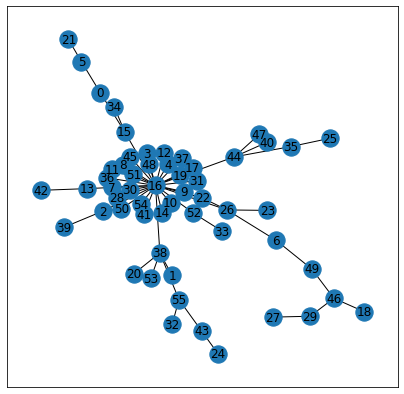

In [150]:
data = dataset[73]
G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y,wlabels=True)

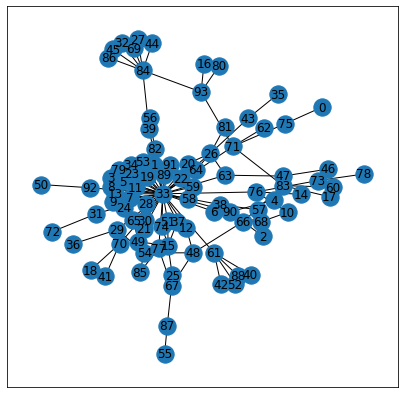

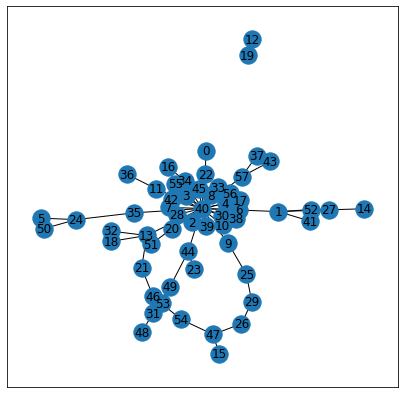

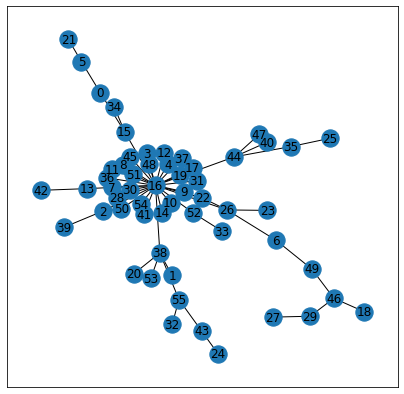

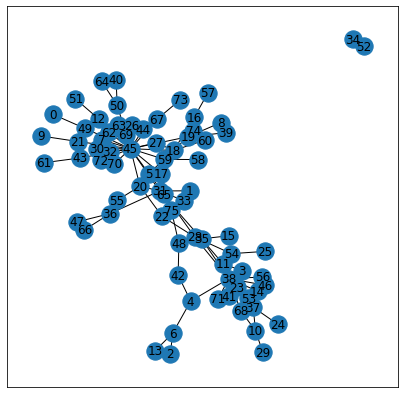

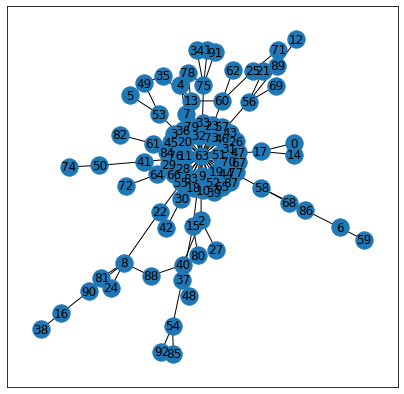

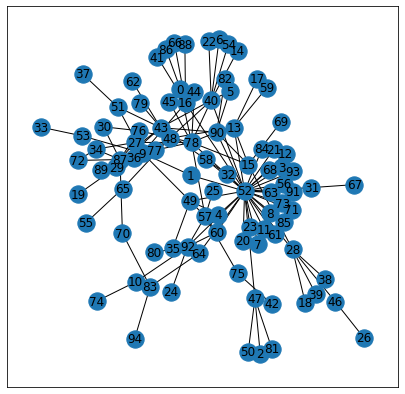

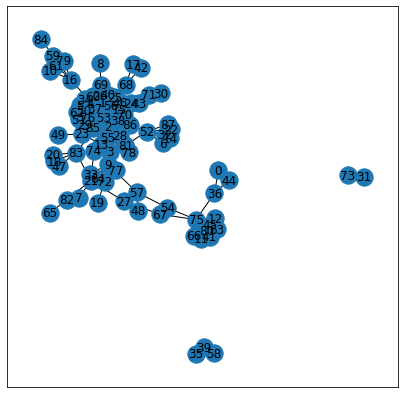

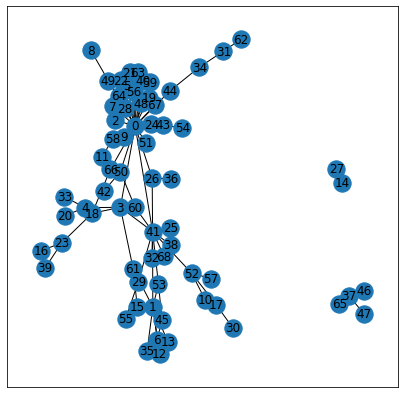

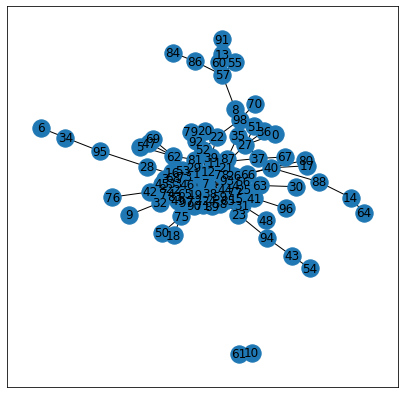

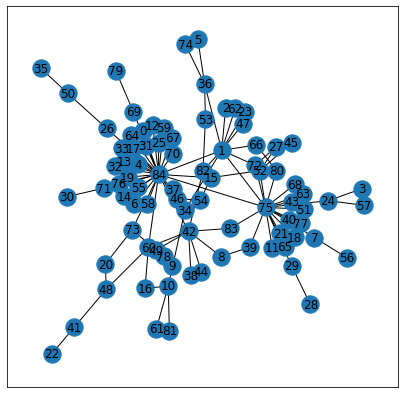

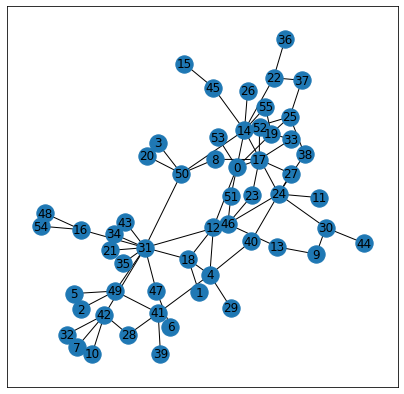

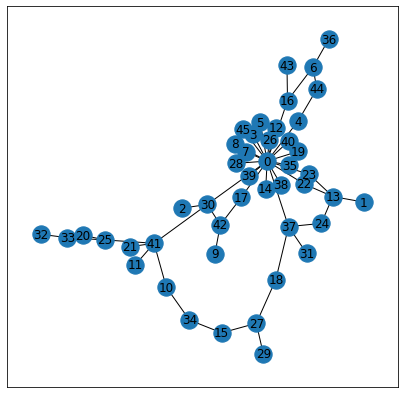

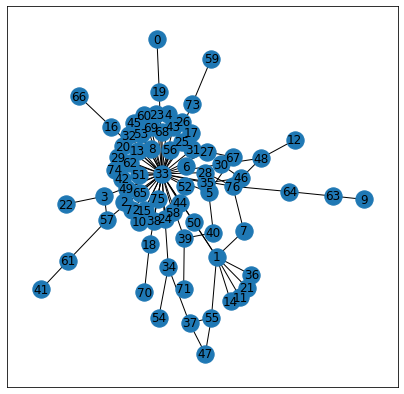

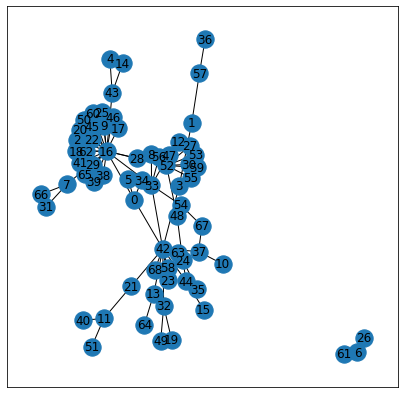

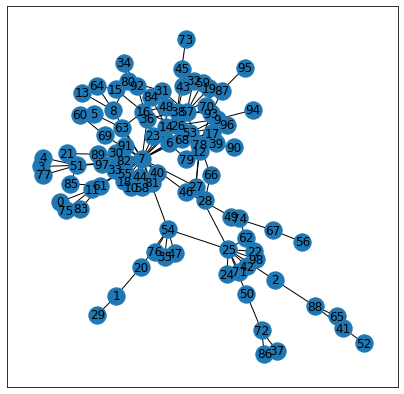

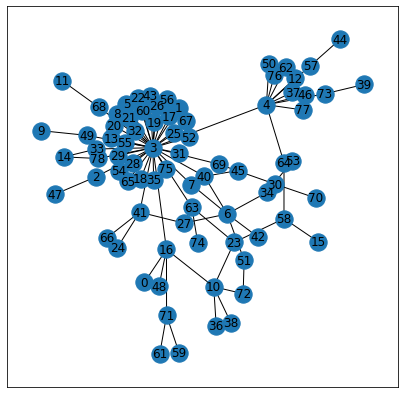

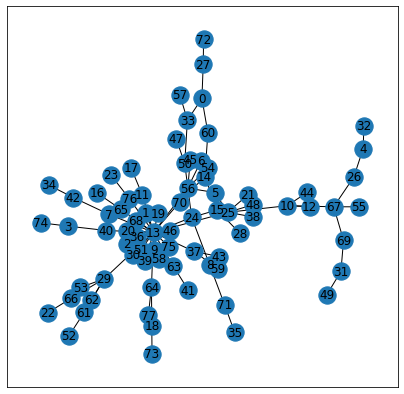

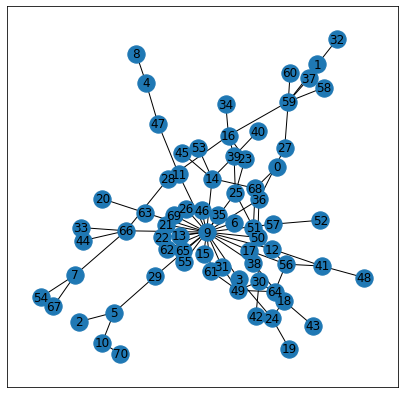

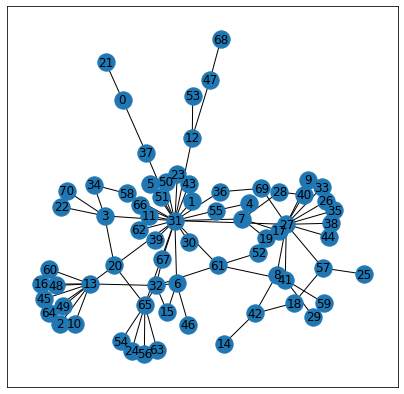

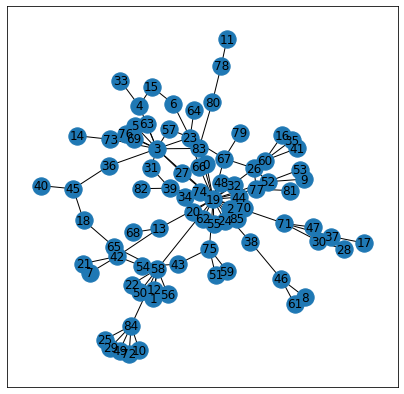

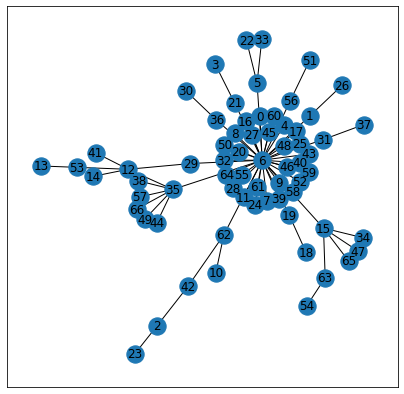

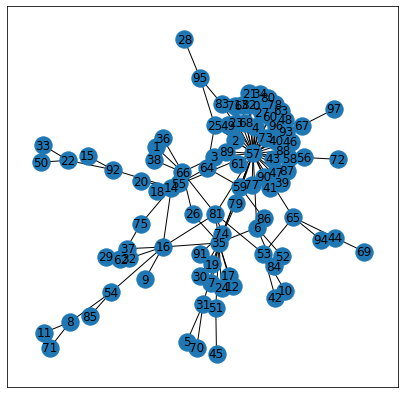

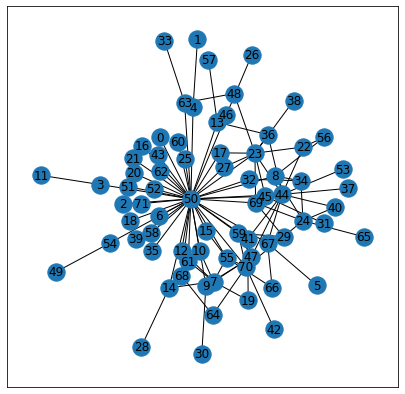

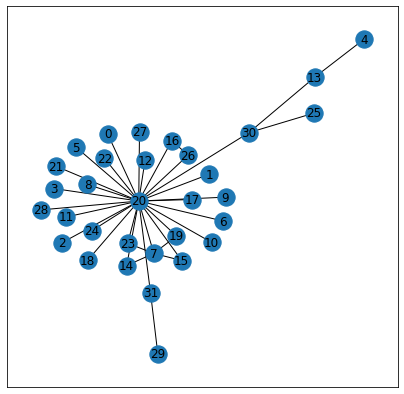

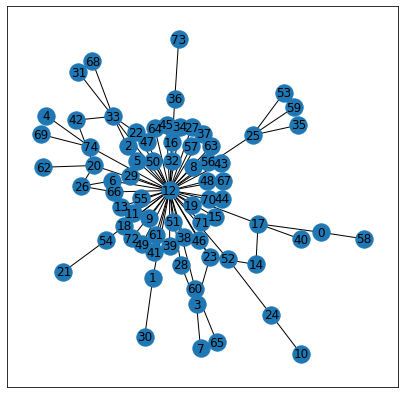

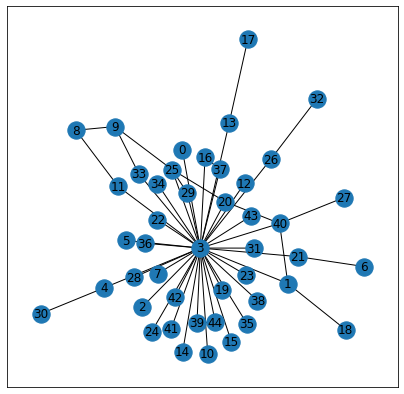

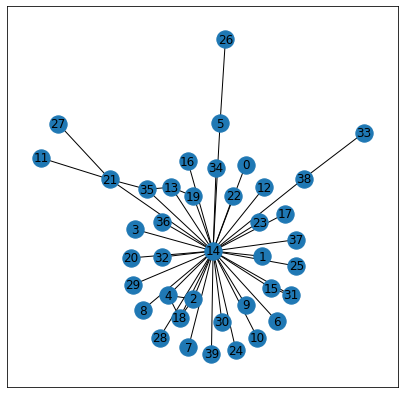

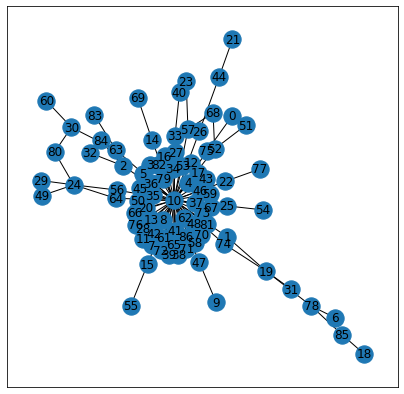

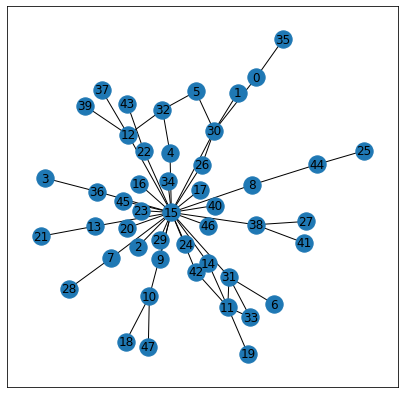

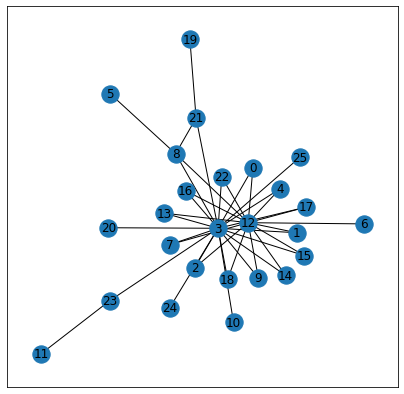

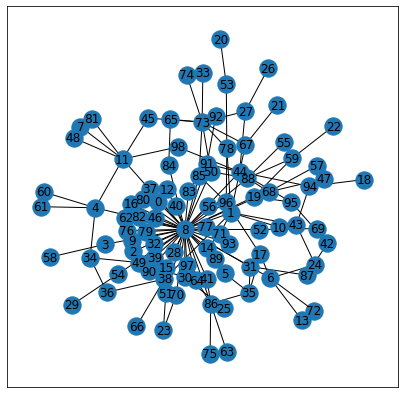

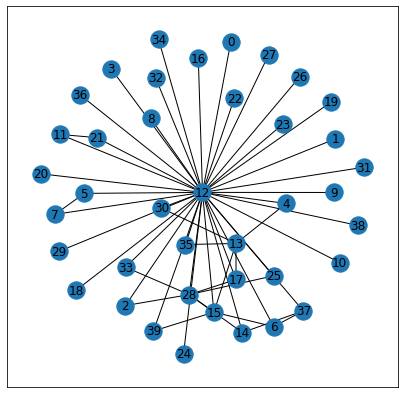

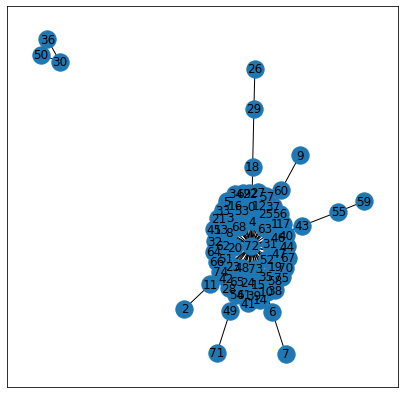

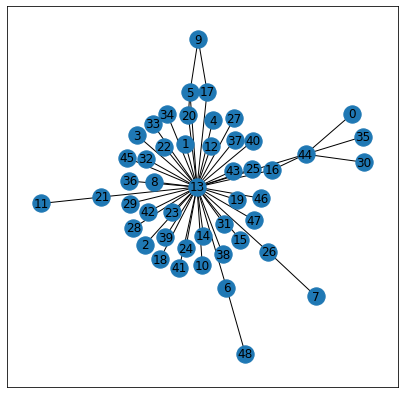

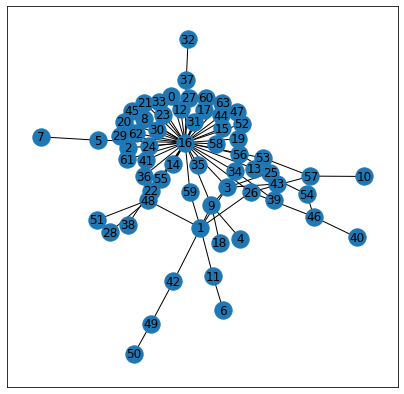

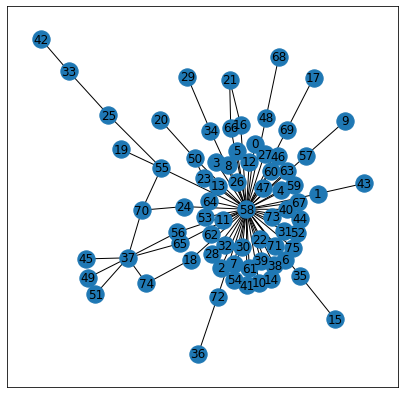

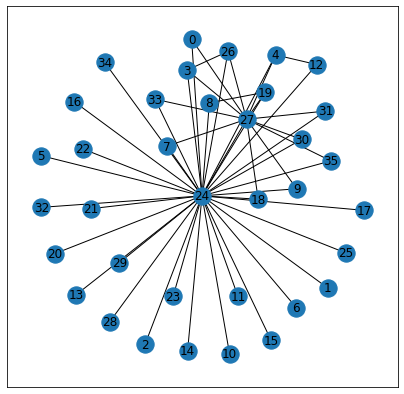

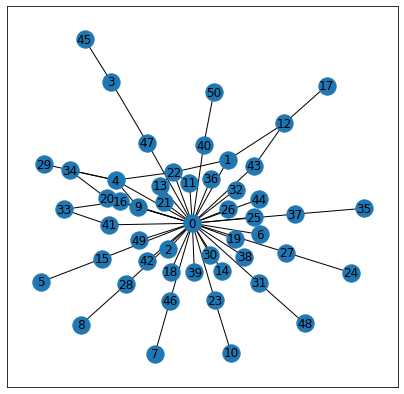

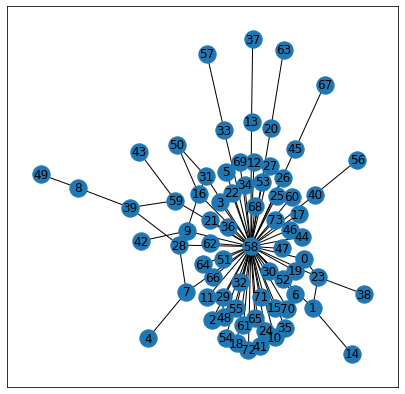

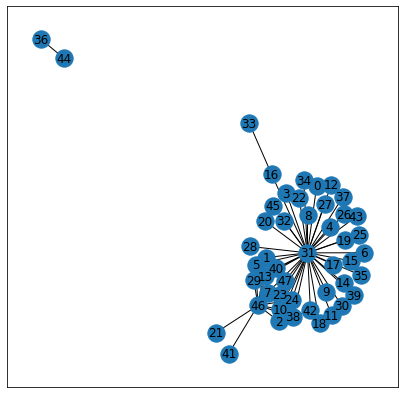

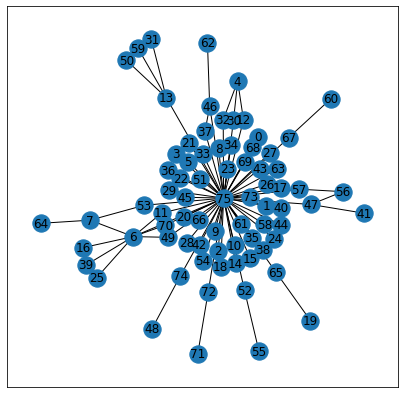

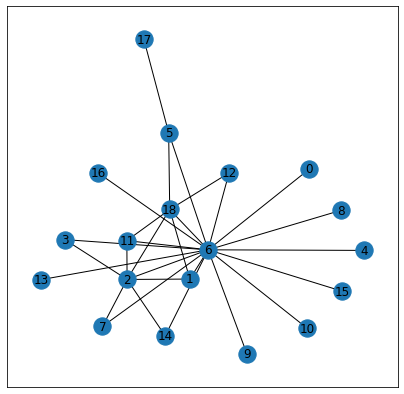

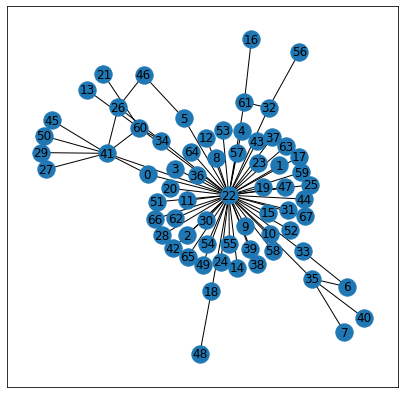

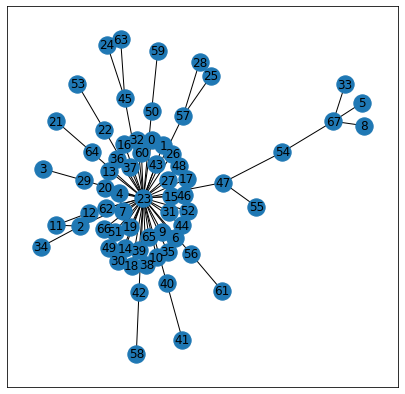

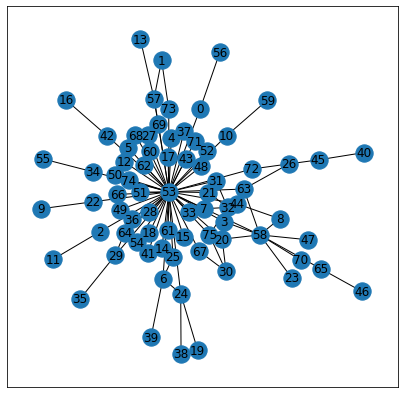

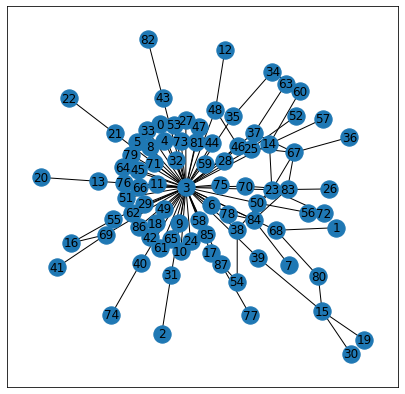

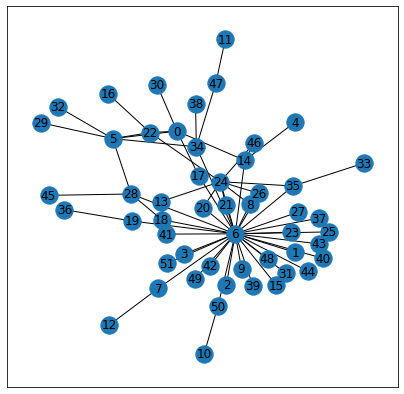

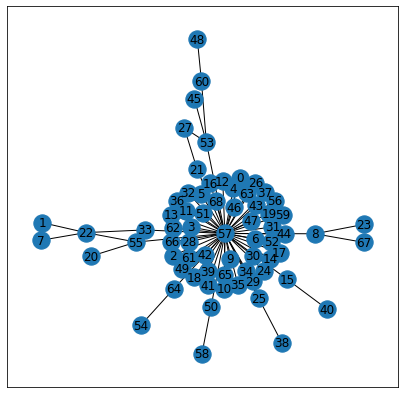

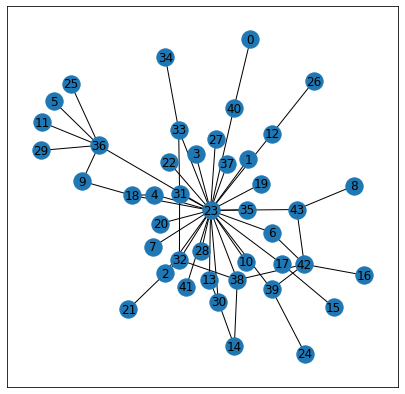

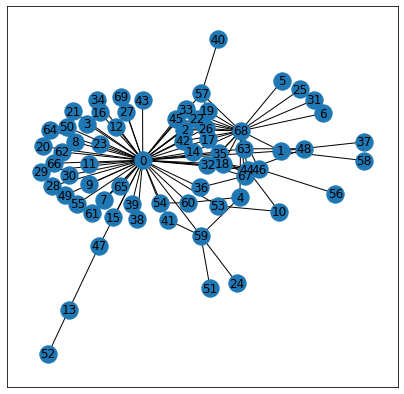

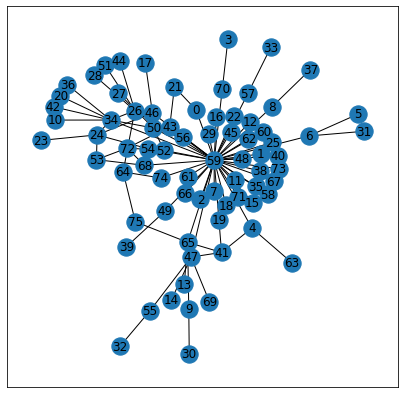

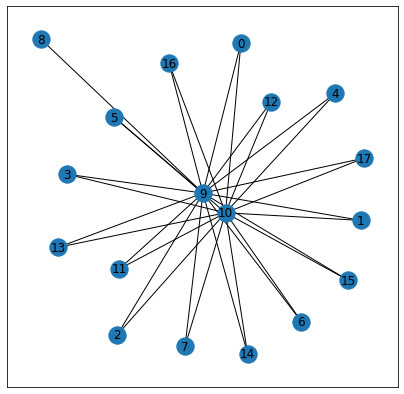

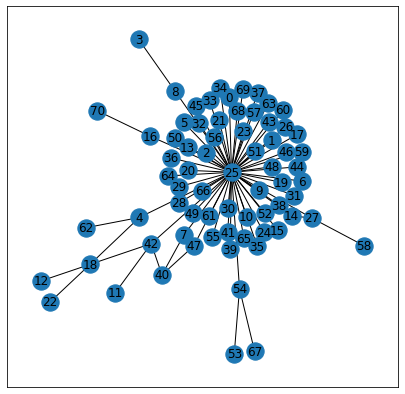

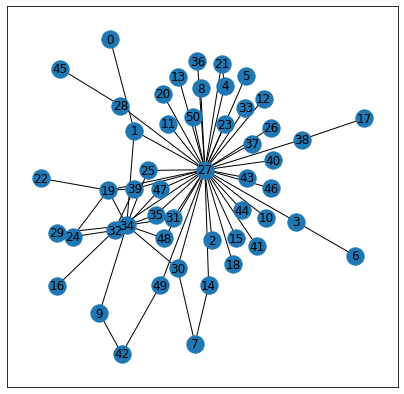

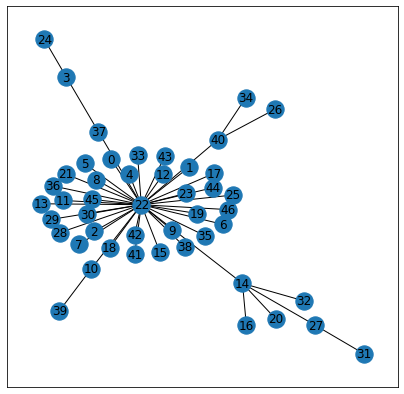

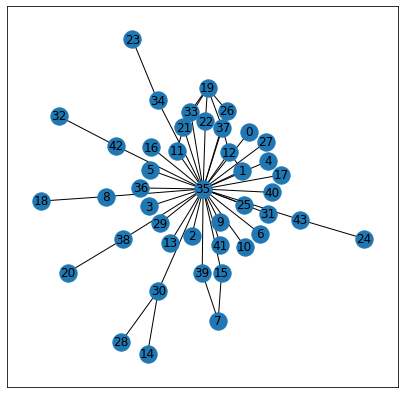

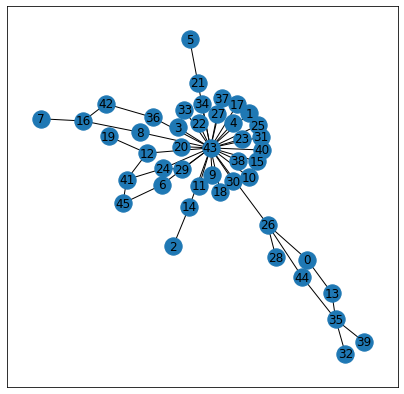

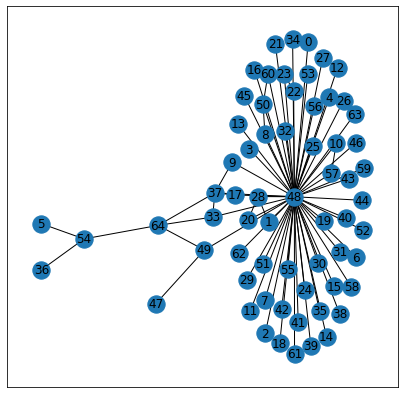

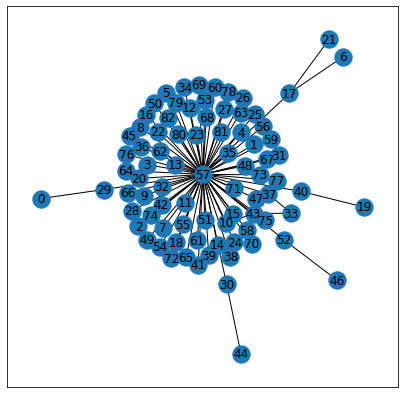

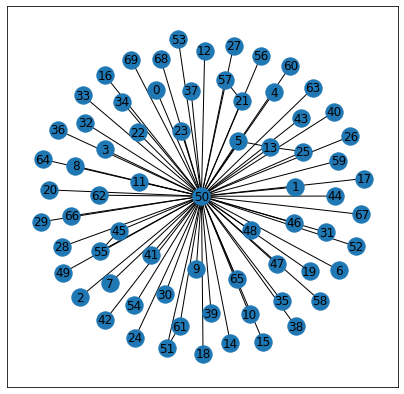

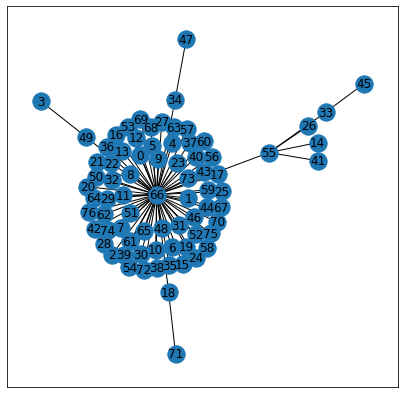

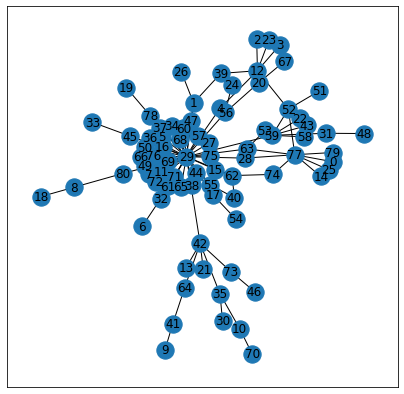

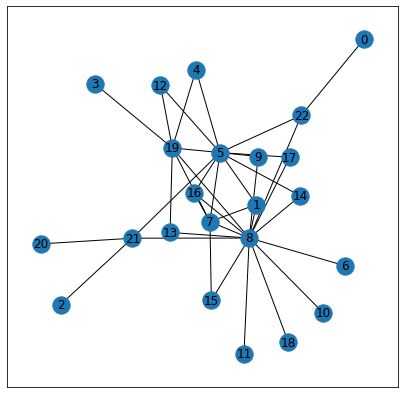

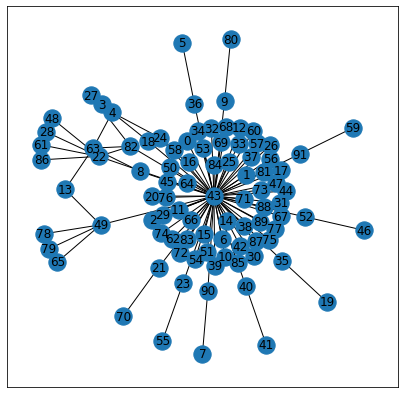

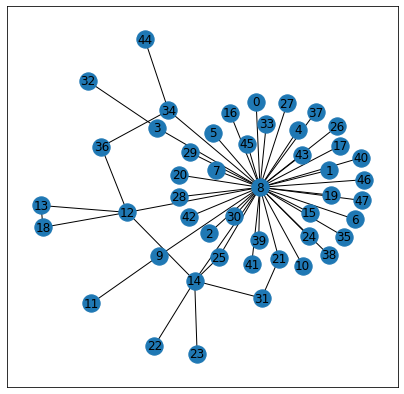

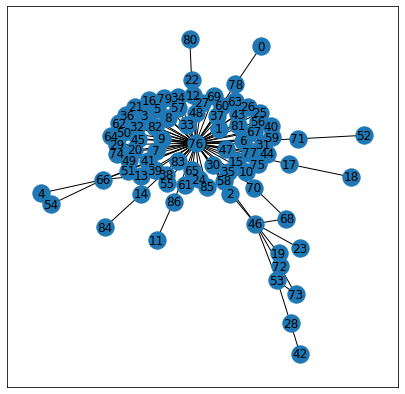

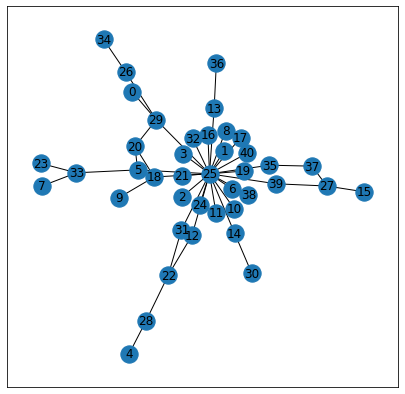

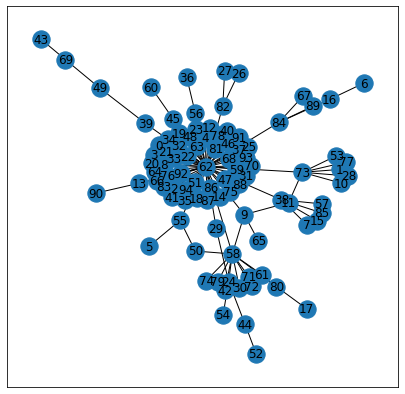

In [155]:
import numpy as np
for i in range(0, 1113):
    data = dataset[i]
    if data.num_nodes < 100:
        data = dataset[i]
        G = to_networkx(data, to_undirected=True)
        visualize(G, color=data.y,wlabels=True)

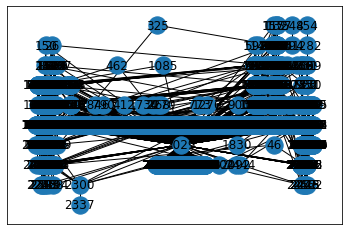

In [51]:
nx.draw_networkx(G, pos=nx.nx_pydot.pydot_layout(G, prog="dot"), labels=None, with_labels=True)